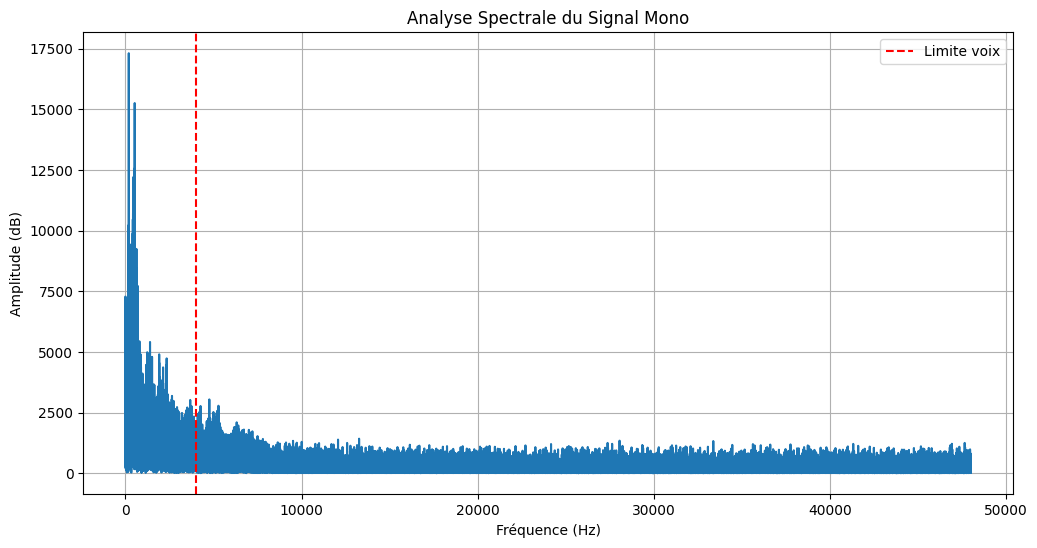

In [17]:
import msicpe.ssl as ssl
import numpy as np
import sounddevice as sd  # Pour l'écoute
import matplotlib.pyplot as plt

file_path = "choices.wav"
signal_mono, fe = ssl.audioread(file_path, play_audio=False)
import numpy as np
import matplotlib.pyplot as plt

# Calcul de la FFT (analyse fréquentielle)
n = len(signal_mono)
fft_result = np.fft.rfft(signal_mono)
freqs = np.fft.rfftfreq(n, d=1/fe)

# Visualisation interactive
plt.figure(figsize=(12, 6))
plt.plot(freqs, np.abs(fft_result))
plt.title("Analyse Spectrale du Signal Mono")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude (dB)")
plt.axvline(4000, color='r', linestyle='--', label='Limite voix')
plt.legend()
plt.grid()
plt.show()

In [18]:
from scipy import signal
import numpy as np

# Création d'un filtre passe-bande + égalisation avec des sections valides
sos_passe_bande = signal.butter(
    N=4,  # Ordre total
    Wn=[100, 4000], 
    btype='bandpass',
    fs=fe,
    output='sos'  # Génère directement le format correct
)

# Ajout d'une égalisation à 2000 Hz (exemple)
sos_eq_boost = signal.iirpeak(
    w0=2000,  # Fréquence centrale
    Q=2,      # Facteur de qualité
    fs=fe
)

# Combinaison des sections
sos_combined = np.vstack([sos_passe_bande, sos_eq_boost])

# Vérification de la forme
print("Shape de sos_combined:", sos_combined.shape)  # Doit être (N, 6)

# Application du filtre
signal_final = signal.sosfiltfilt(sos_combined, signal_mono)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6 and the array at index 1 has size 3